In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,...,0,0,0,1,0,0,1,1,1,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,...,1,0,2,0,0,1,33,0,5,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,...,0,0,3,0,0,0,4,0,5,0.0
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,...,1,0,0,0,0,1,0,0,0,80.0
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,...,0,0,0,0,0,0,0,0,0,88.0


In [9]:
df.shape

(3683, 40)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3681 non-null   object 
 1   society              3680 non-null   object 
 2   sector               3683 non-null   object 
 3   price                3664 non-null   float64
 4   price_per_sqft       3664 non-null   float64
 5   area                 3664 non-null   float64
 6   areaWithType         3681 non-null   object 
 7   bedRoom              3681 non-null   float64
 8   bathroom             3681 non-null   float64
 9   balcony              3681 non-null   object 
 10  floorNum             3662 non-null   float64
 11  facing               2633 non-null   object 
 12  agePossession        3683 non-null   object 
 13  super_built_up_area  1876 non-null   float64
 14  built_up_area        1260 non-null   float64
 15  carpet_area          952 non-null    f

In [17]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)

In [29]:
df.head(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,...,0,0,0,1,0,0,1,1,1,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,...,1,0,2,0,0,1,33,0,5,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,...,0,0,3,0,0,0,4,0,5,0.0


### 1.Property Type

<Axes: xlabel='property_type'>

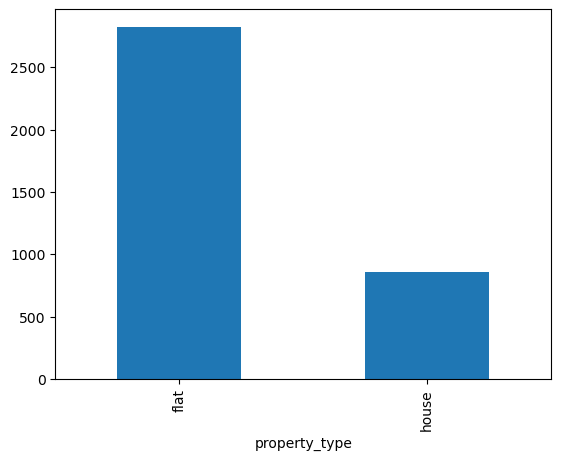

In [35]:
df['property_type'].value_counts().plot(kind='bar')

### 2.Society

In [39]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
elevate                                   1
apartment                                 1
smart world one dxp                       1
rajendra park gurgaon                     1
city shri ram apartments 1                1
Name: count, Length: 676, dtype: int64

In [63]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023489
ss the leaf                             0.046351
shapoorji pallonji joyville gurugram    0.059505
dlf new town heights                    0.072659
signature global park                   0.083307
                                          ...   
umang monsoon breeze                    0.490135
umang winter hills                      0.494206
ramsons kshitij                         0.498277
ansal heights 86                        0.502349
mvn athens                              0.506107
Name: proportion, Length: 75, dtype: float64

In [85]:
society_counts = df['society'].value_counts()

#frequency Distribution
frequency_bins= {
   "Very High Flats(>100)":(society_counts>100).sum(),
    "High Flats(50-100)":((society_counts>=50)&(society_counts<=100)).sum(),
   "Average Flats(10-50)":((society_counts<=50)&(society_counts>=10)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High Flats(>100)': 1,
 'High Flats(50-100)': 2,
 'Average Flats(10-50)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

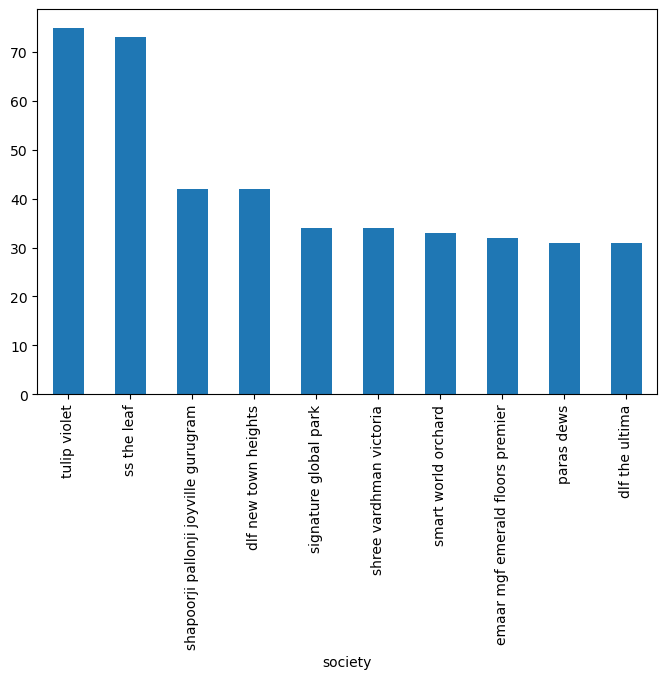

In [119]:
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind='bar',figsize=(8,5))

In [127]:
df['society'].isnull().sum()

3

In [129]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
1758,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2.0,2.0,0,...,0,0,0,0,0,0,0,0,0,42.0
3681,NaN,NaN,sector 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3682,NaN,NaN,sector 76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


## Observations
- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
- Very High (>100): Only 1 society has more than 100 listings.
- High (50-100): 2 societies have between 50 to 100 listings.
- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 273 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 308 societies, have only 1 listing.
- 3 missing value, didn't drop them.

### 2. Sector

In [139]:
df['sector'].value_counts()

sector
sohna road    153
sector 85     108
sector 102    106
sector 92     100
sector 69      93
             ... 
sector 27       3
sector 73       3
sector 17b      3
sector 17a      3
sector 37       1
Name: count, Length: 115, dtype: int64

<Axes: xlabel='sector'>

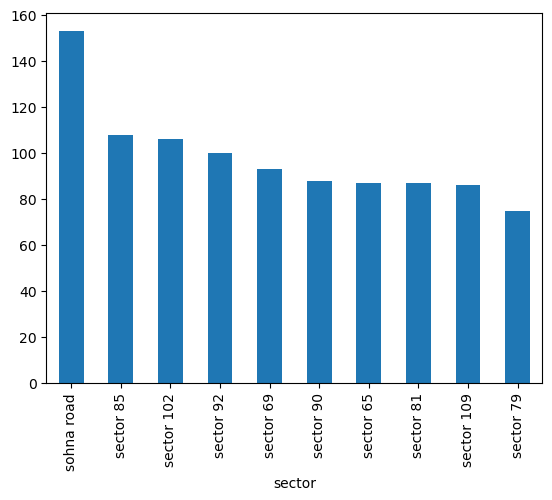

In [143]:
df['sector'].value_counts().head(10).plot(kind='bar')

In [155]:
sector_counts = df['sector'].value_counts()

#frequency distribution
sector_frequency = {
    "Very High Sectors(>100)":(sector_counts>100).sum(),
    "High Sectors(50-100)":((sector_counts>=50)&(sector_counts<=100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency

{'Very High Sectors(>100)': 3,
 'High Sectors(50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

### 3. Price

In [162]:
df['price'].describe()

count    3663.000000
mean        2.533787
std         2.979286
min         0.070000
25%         0.950000
50%         1.530000
75%         2.750000
max        31.500000
Name: price, dtype: float64

In [164]:
df['price'].isnull().sum()

19

<Axes: xlabel='price', ylabel='Count'>

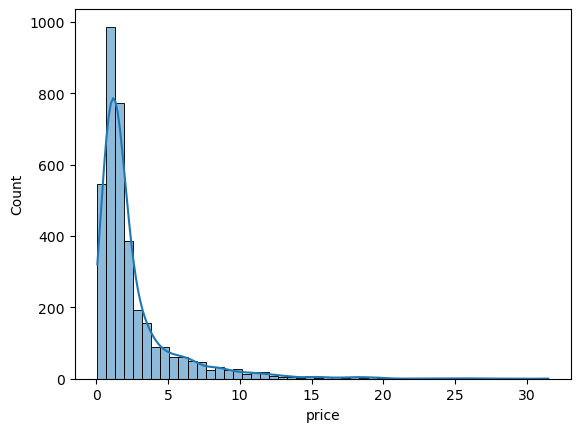

In [168]:
sns.histplot(df['price'],kde=True,bins=50)

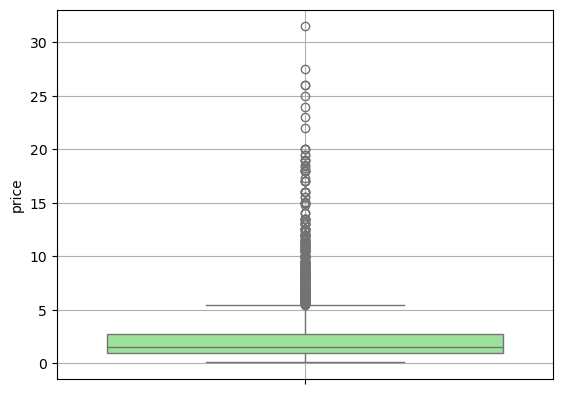

In [174]:
sns.boxplot(df['price'],color='lightgreen')
plt.grid()

In [180]:
#skewness and kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2808381561991324 14.950273204760892


In [182]:
#Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles


0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.252
Name: price, dtype: float64

In [184]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [186]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [188]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 40)

In [190]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

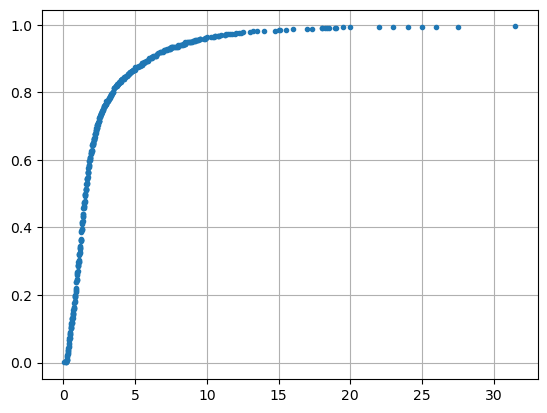

In [194]:
# ecdf plot empirical cummilative distribution function
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

### If the data is rightly skewed, we can perform the log transformation

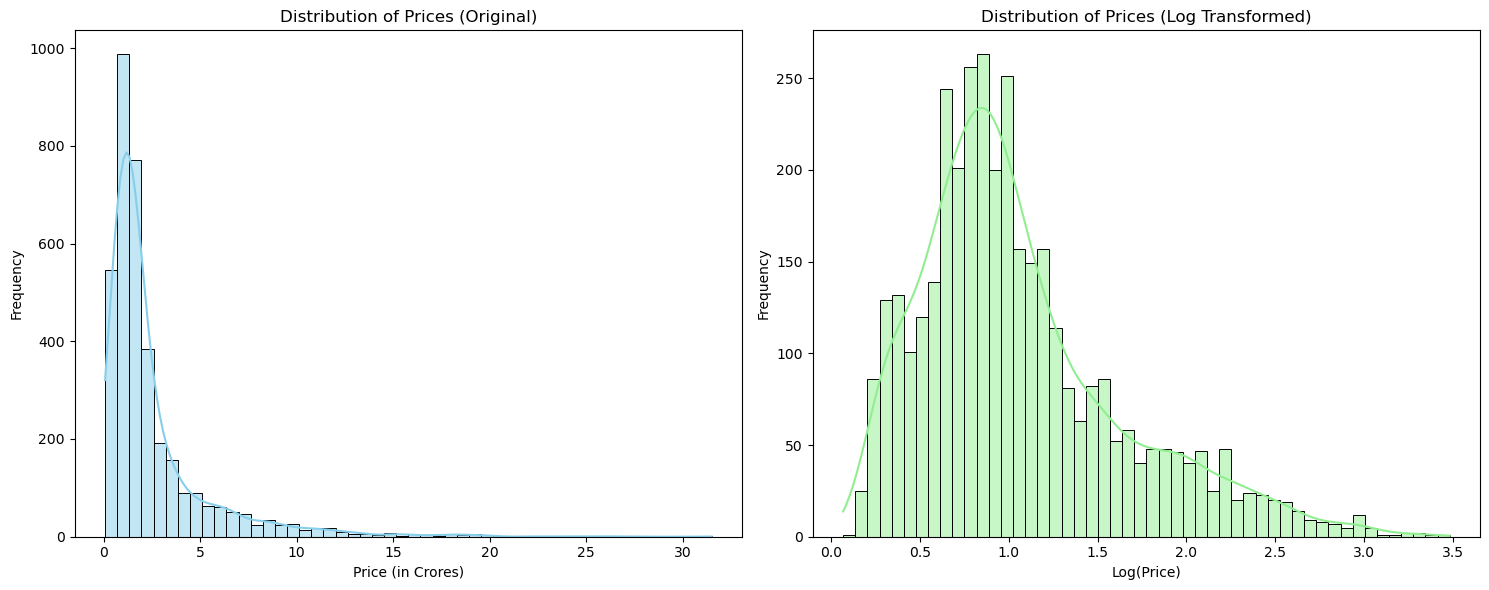

In [197]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4. Price_per_sqft

In [201]:
df['price_per_sqft'].isnull().sum()

19

In [203]:
df['price_per_sqft'].describe()

count      3663.000000
mean      13897.214851
std       23200.629757
min           4.000000
25%        6818.500000
50%        9022.000000
75%       13888.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

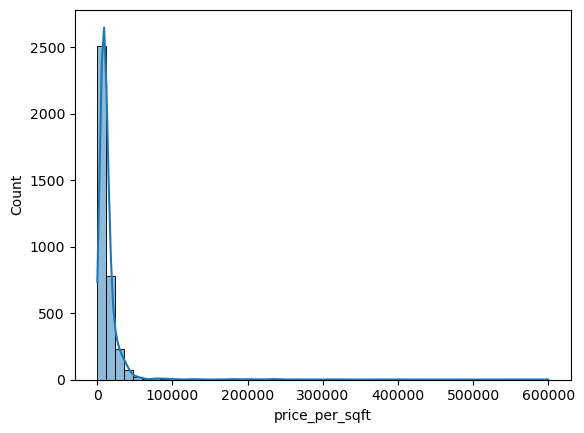

In [209]:
sns.histplot(df['price_per_sqft'],bins=50,kde=True)

<Axes: ylabel='price_per_sqft'>

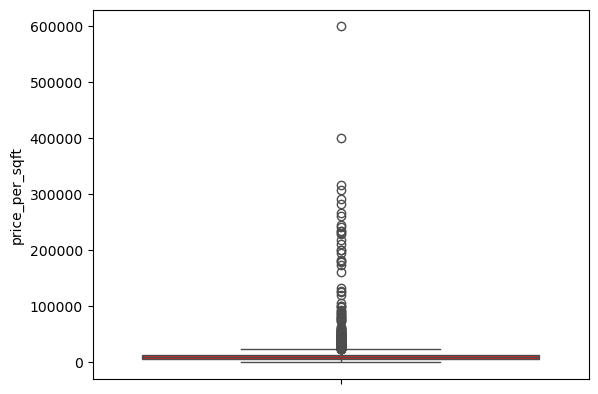

In [225]:
sns.boxplot(df['price_per_sqft'],color='red')

### 5.BedRoom

In [230]:
df[df['bedRoom'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
3681,NaN,NaN,sector 92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
3682,NaN,NaN,sector 76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN


In [240]:
df.dropna(subset=['bedRoom'],inplace=True)

In [242]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

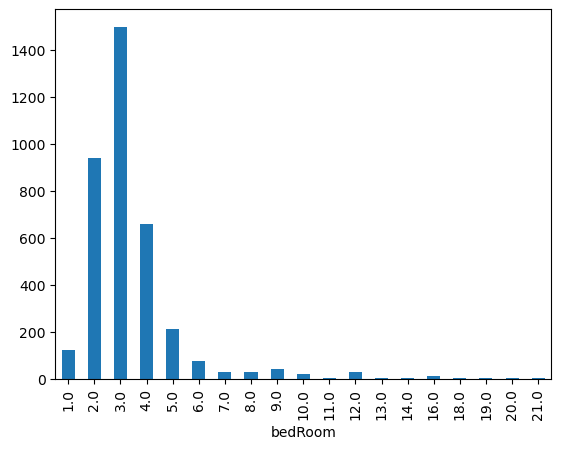

In [254]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

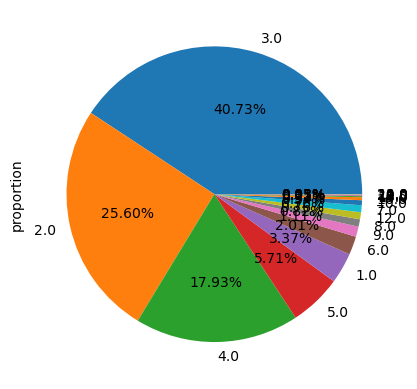

In [268]:
df['bedRoom'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### 6.Bathroom

In [275]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

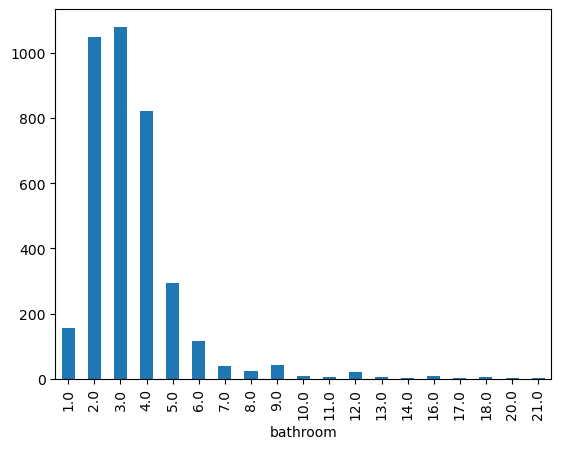

In [281]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

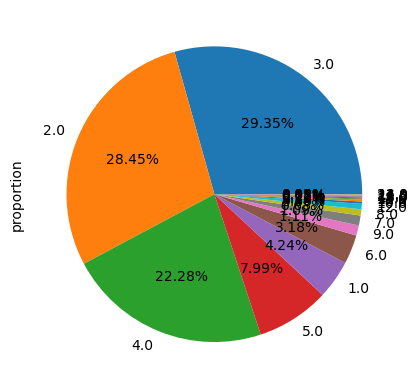

In [285]:
df['bathroom'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

### 7.Balcony

In [289]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

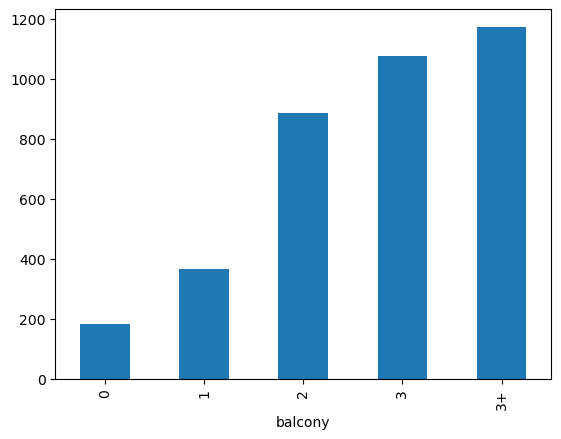

In [295]:
df['balcony'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

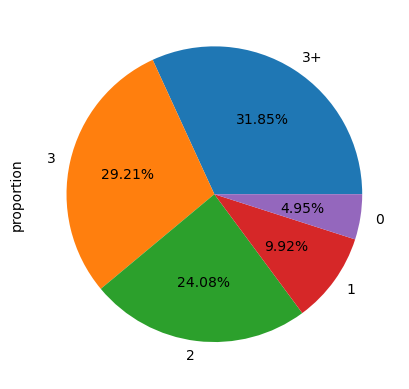

In [297]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')


In [309]:
df.iloc[:,8:].head()

,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,2.0,3,4.0,East,New Property,NaN,NaN,NaN,0,0,...,0,0,0,1,0,0,1,1,1,80.0
1,3.0,3,4.0,North-East,Relatively New,1450.0,NaN,1177.00,0,0,...,1,0,2,0,0,1,33,0,5,97.0
2,3.0,3+,4.0,North-West,New Property,NaN,2160.0,NaN,0,1,...,0,0,3,0,0,0,4,0,5,0.0
3,2.0,2,6.0,South,Relatively New,1276.0,NaN,904.01,0,0,...,1,0,0,0,0,1,0,0,0,80.0
4,4.0,3+,7.0,North-West,Relatively New,2727.0,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,88.0


## 8.floorNum

In [316]:
df['floorNum'].isnull().sum()

19

In [320]:
df.iloc[:,8:][df['floorNum'].isnull()]

,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
10,3.0,0,NaN,NaN,Old Property,NaN,1458.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0.0
33,4.0,3+,NaN,West,Moderately Old,NaN,3200.0,NaN,0,1,...,1,0,2,0,1,0,10,1,6,130.0
398,1.0,0,NaN,NaN,Old Property,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,150.0
444,1.0,0,NaN,NaN,Under Construction,NaN,1242.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0.0
866,4.0,2,NaN,East,Moderately Old,NaN,3240.0,NaN,0,1,...,1,0,0,0,0,0,0,0,0,21.0
1149,4.0,2,NaN,North-East,Old Property,NaN,3762.0,NaN,0,1,...,0,0,0,0,0,0,6,0,6,21.0
1171,3.0,0,NaN,NaN,Under Construction,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,49.0
1264,14.0,3+,NaN,East,New Property,NaN,1845.0,NaN,0,1,...,1,0,13,0,1,0,23,0,15,49.0
1758,2.0,0,NaN,NaN,Under Construction,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,42.0
1920,2.0,2,NaN,NaN,Moderately Old,NaN,585.0,NaN,0,0,...,1,0,0,0,1,0,10,0,0,7.0


In [322]:
df['floorNum'].describe()

count    3661.000000
mean        3.196941
std         2.762602
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

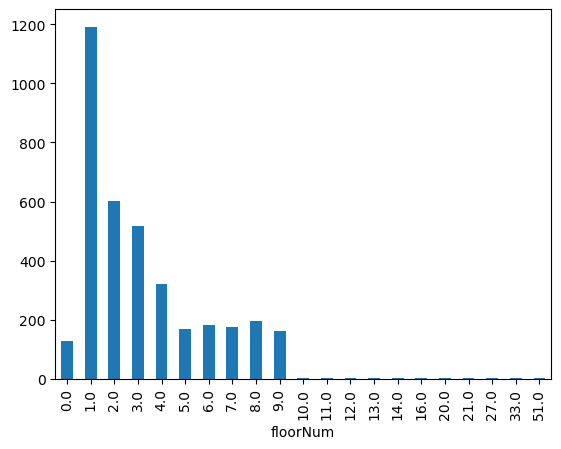

In [328]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

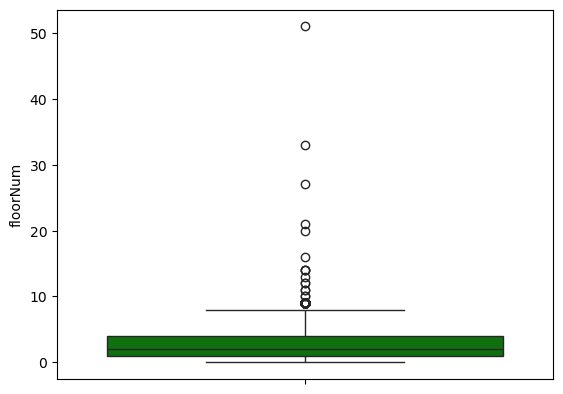

In [330]:
sns.boxplot(df['floorNum'],color='green')

## 9.facing

In [338]:
df['facing'].isnull().sum()

1048

In [340]:
df['facing'].fillna('NA',inplace=True)

In [354]:
df['facing'].sample(10)

661           East
437     South-West
960           West
597             NA
3241         North
806             NA
693             NA
276             NA
1484          East
2989         North
Name: facing, dtype: object

In [356]:
df['facing'].value_counts()

facing
NA            1048
East           624
North-East     623
North          387
West           249
South          230
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

## 10.AgePosession

In [363]:
df['agePossession'].isnull().sum()

0

In [365]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              440
Old Property           303
Under Construction     135
Name: count, dtype: int64

In [367]:
df.iloc[:,12:]

,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,Sofa,...,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,New Property,NaN,NaN,NaN,0,0,0,0,0,1,...,0,0,0,1,0,0,1,1,1,80.0
1,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,0,...,1,0,2,0,0,1,33,0,5,97.0
2,New Property,NaN,2160.0,NaN,0,1,1,0,0,0,...,0,0,3,0,0,0,4,0,5,0.0
3,Relatively New,1276.0,NaN,904.01,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,80.0
4,Relatively New,2727.0,NaN,NaN,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,Old Property,2000.0,1800.0,1600.00,0,0,0,0,1,0,...,1,0,2,0,1,0,11,0,6,NaN
3677,Moderately Old,NaN,1700.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3678,Relatively New,NaN,NaN,NaN,0,0,0,1,0,0,...,1,0,0,0,1,0,5,1,3,NaN
3679,Relatively New,1900.0,1600.0,1240.04,0,1,0,0,0,0,...,1,0,3,0,1,0,8,1,10,NaN


### 11.Areas

In [370]:
## super built up area
df['super_built_up_area'].isnull().sum()


1804

In [372]:
df['super_built_up_area'].describe()


count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

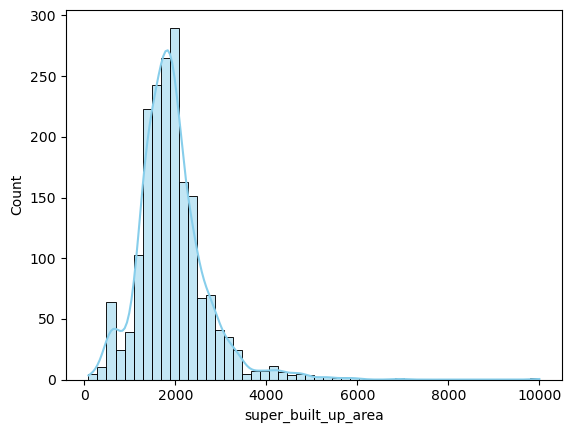

In [374]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)


<Axes: ylabel='super_built_up_area'>

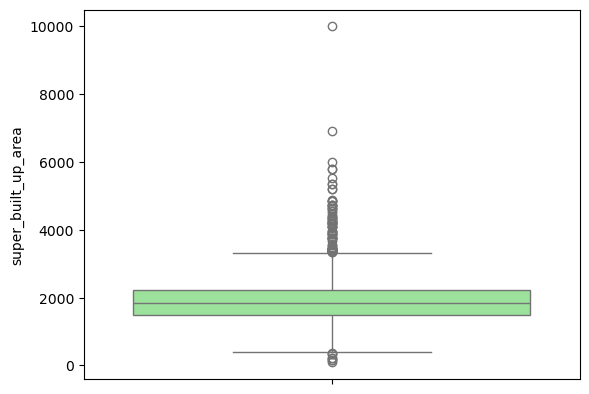

In [376]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')


In [378]:
# built up area
df['built_up_area'].isnull().sum()

2420

In [380]:
df['built_up_area'].describe()

count     1260.000000
mean      1981.844627
std       1347.305556
min          2.000000
25%       1200.000000
50%       1750.000000
75%       2430.000000
max      13500.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

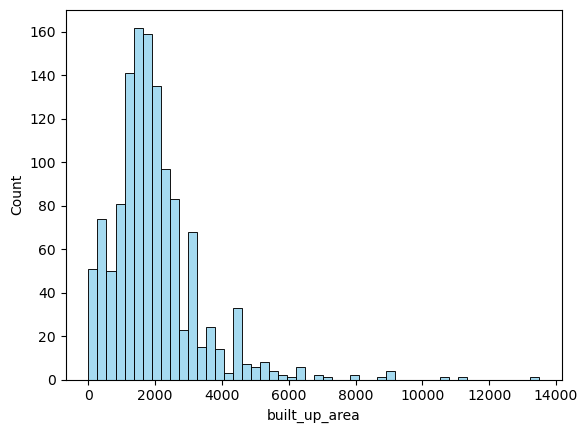

In [382]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)


<Axes: ylabel='built_up_area'>

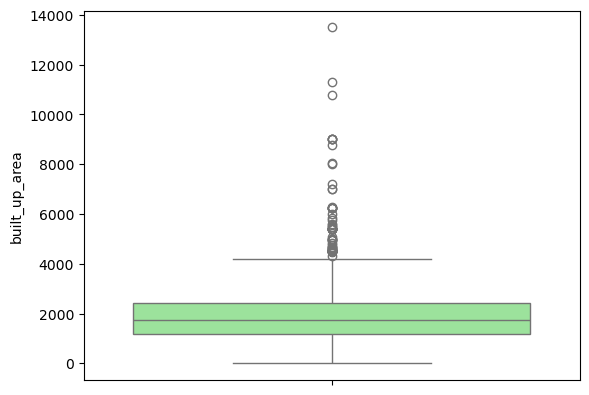

In [384]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')


In [386]:
# carpet area
df['carpet_area'].isnull().sum()

2728

In [388]:
df['carpet_area'].describe()

count     952.000000
mean     1456.931229
std       618.770491
min        86.000000
25%      1055.750000
50%      1400.000000
75%      1750.500000
max      4900.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

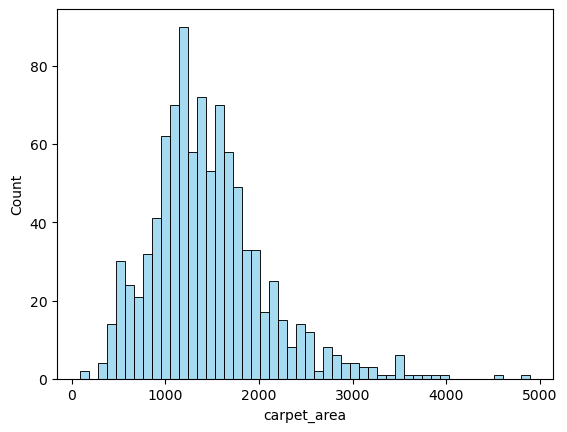

In [390]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)


<Axes: ylabel='carpet_area'>

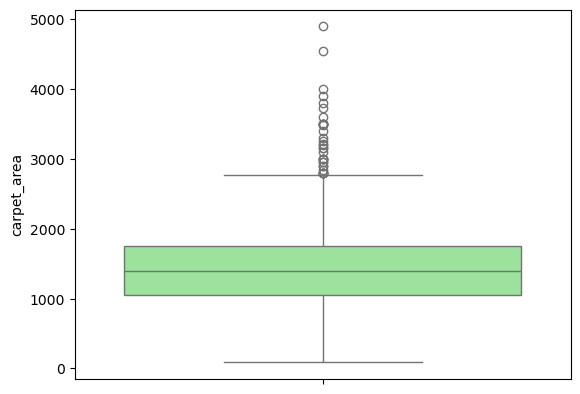

In [392]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')


In [400]:
df.iloc[:,20:]

,others,Sofa,TV,Dining Table,AC,Chimney,Bed,Washing Machine,Water Purifier,Wardrobe,Modular Kitchen,Fridge,Geyser,Microwave,Exhaust Fan,Stove,Light,Curtains,Fan,luxury_score
0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,80.0
1,0,0,0,0,4,1,0,0,1,10,1,0,2,0,0,1,33,0,5,97.0
2,0,0,0,0,0,0,0,0,0,4,0,0,3,0,0,0,4,0,5,0.0
3,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,80.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,1,0,0,0,0,1,0,0,0,3,1,0,2,0,1,0,11,0,6,NaN
3677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3678,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,5,1,3,NaN
3679,0,0,0,0,4,1,0,0,0,3,1,0,3,0,1,0,8,1,10,NaN


In [416]:
df= df.drop(columns=['Sofa','TV','Dining Table','AC','Chimney','Bed','Washing Machine','Water Purifier','Wardrobe','Modular Kitchen','Fridge',
'Geyser','Microwave','Exhaust Fan','Stove','Light','Curtains','Fan'])

In [418]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,pooja room,store room,others,luxury_score
0,flat,signature global park,sohna road,0.55,7355.0,748.0,Carpet area: 745 (69.21 sq.m.),2.0,2.0,3,...,New Property,NaN,NaN,NaN,0,0,0,0,0,80.0
1,flat,emaar mgf palm hills,sector 77,1.50,12744.0,1177.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,3.0,3,...,Relatively New,1450.0,NaN,1177.00,0,0,0,0,0,97.0
2,house,vatika india next,sector 83,1.70,7870.0,2160.0,Plot area 240(200.67 sq.m.),3.0,3.0,3+,...,New Property,NaN,2160.0,NaN,0,1,1,0,0,0.0
3,flat,la vida by tata housing,sector 113,1.45,11363.0,1276.0,Super Built up area 1276(118.54 sq.m.)Carpet a...,2.0,2.0,2,...,Relatively New,1276.0,NaN,904.01,0,0,0,0,0,80.0
4,flat,dlf new town heights,sector 90,1.90,5683.0,3343.0,Super Built up area 2727(253.35 sq.m.),4.0,4.0,3+,...,Relatively New,2727.0,NaN,NaN,0,1,1,0,0,88.0


### 12.Additional Rooms

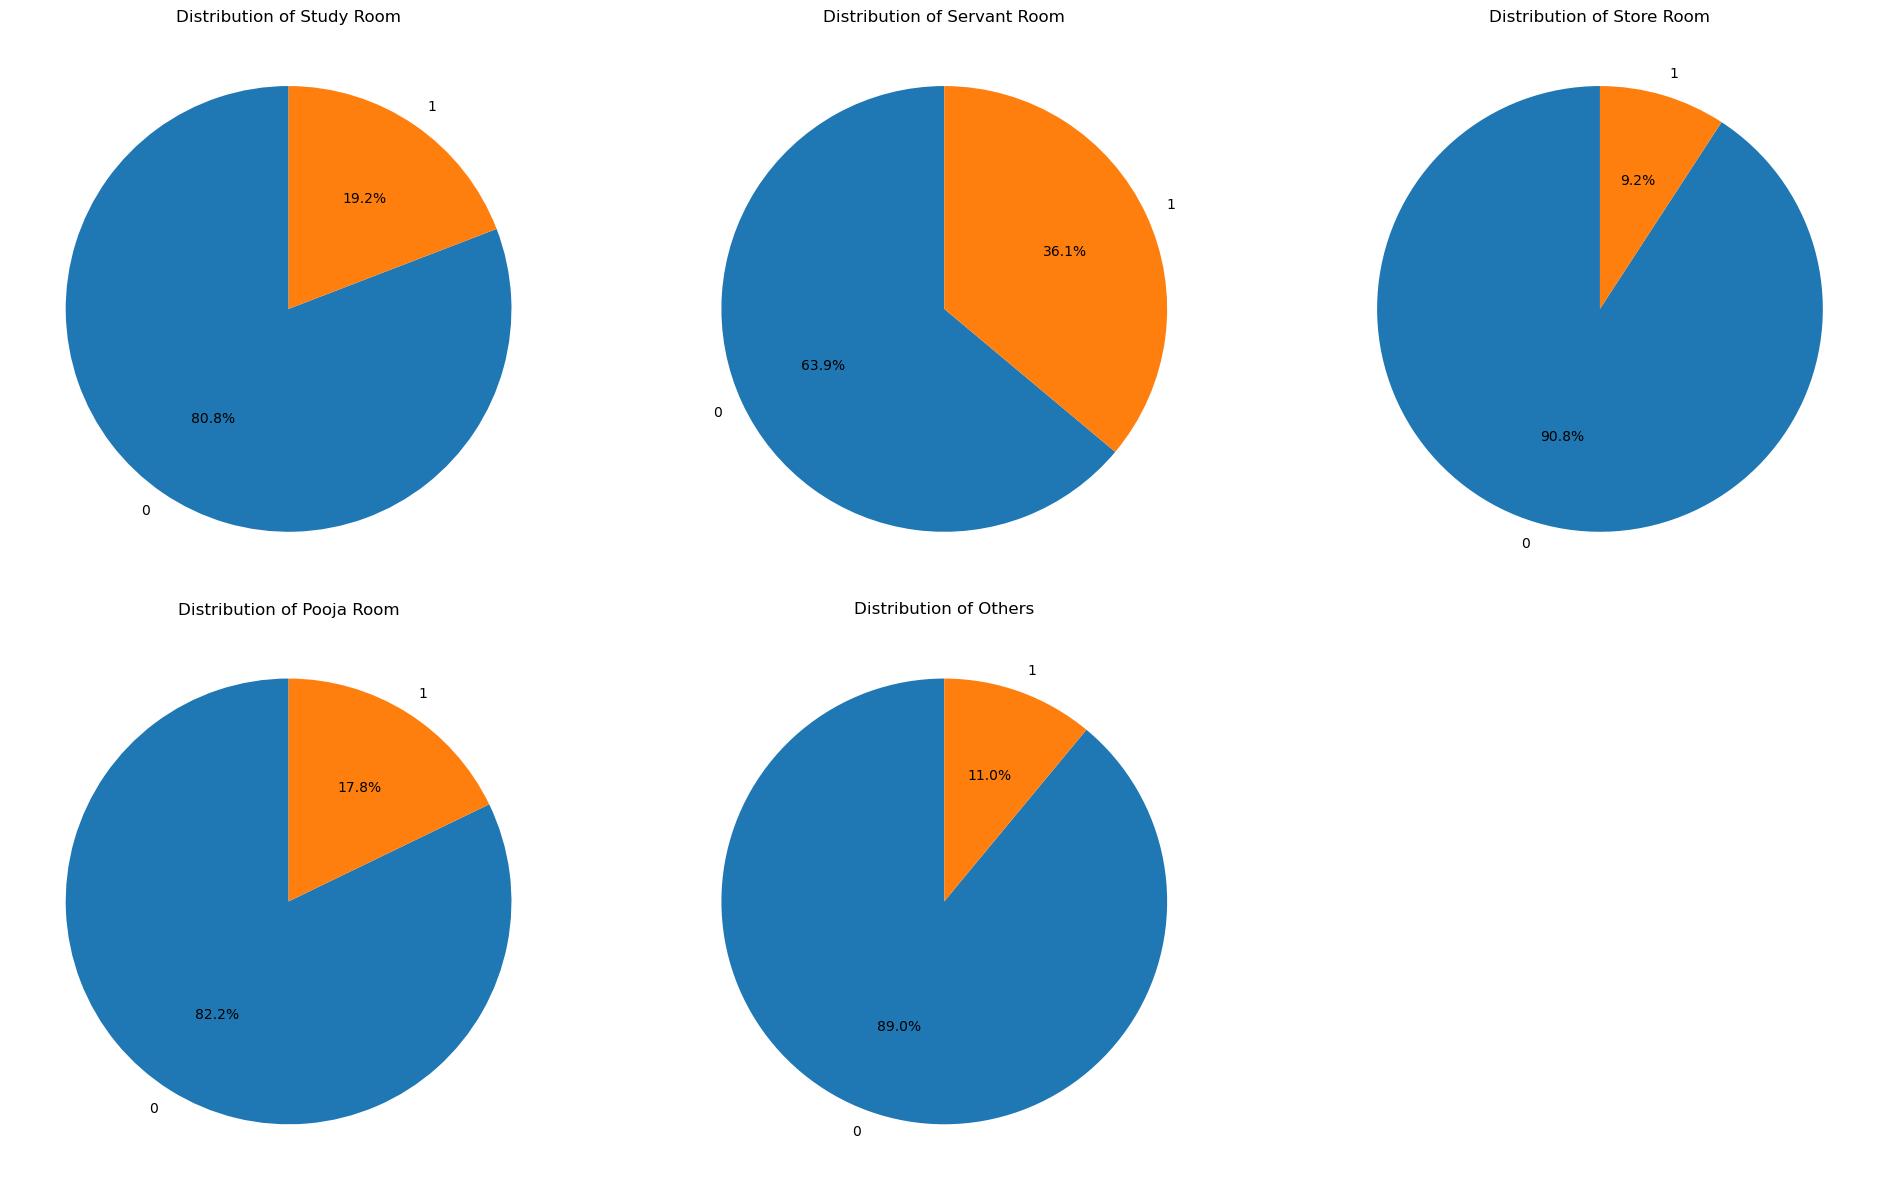

In [421]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### 13. Luxury score

In [442]:
df['luxury_score'].isnull().sum()

114

In [444]:
df['luxury_score'].describe()

count    3566.000000
mean       71.612451
std        53.017022
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

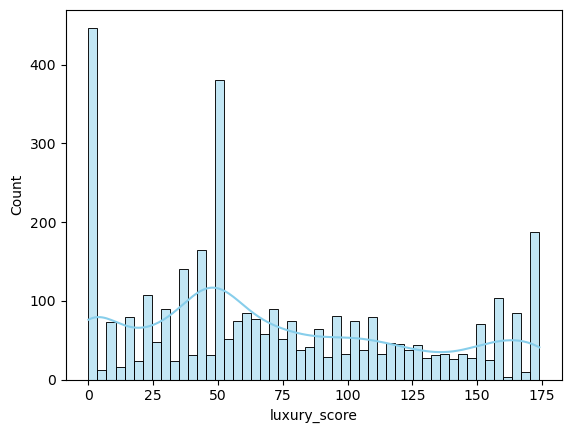

In [446]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

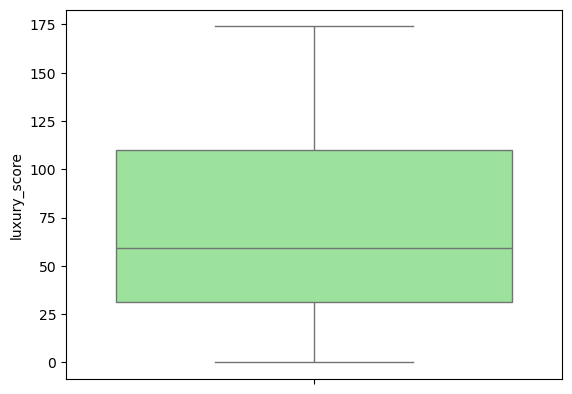

In [448]:
sns.boxplot(df['luxury_score'], color='lightgreen')